In [1]:
import numpy as np
import pandas as pd
import csv
import os, sys, random, math
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF

## Task 1 ##
Load the data file, find two observed data groups and separate them. Describe these two data groups. For each group find mean, variance and median.

In [2]:
# Data saved to various variables 
df = pd.read_csv("../data/data.csv", delimiter=";")

# dataframes
fe3 = df[df['Supplement'] == "Fe3"]
fe4 = df[df['Supplement'] == "Fe4"]
print(fe3.loc[:,'Iron'])

# numpy arrays
fe3_np = np.array(fe3['Iron'])
fe4_np = np.array(fe4['Iron'])

# lists
fe3_list = list(fe3['Iron'])
fe4_list = list(fe4['Iron'])

0     0.71
1     1.66
2     2.01
3     2.16
4     2.42
5     2.42
6     2.56
7     2.60
8     3.31
9     3.64
10    3.74
11    3.74
12    4.39
13    4.50
14    5.07
15    5.26
16    8.15
17    8.24
Name: Iron, dtype: float64


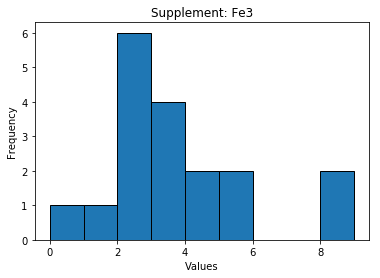

Mean: 3.69888887471623
Variance: 3.895298517760538
Median: 3.475000023841855


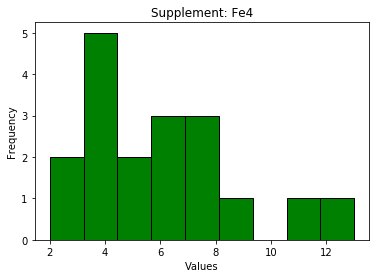

Mean: 5.936666581365796
Variance: 7.440332756872544
Median: 5.75


In [3]:
plt.hist(fe3_np, 9, (0,9), edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Supplement: Fe3')
plt.show()
print("Mean:", np.mean(fe3_np))
print("Variance:", np.var(fe3_np))
print("Median:", np.median(fe3_np))


plt.hist(fe4_np, 9, (2,13), facecolor = 'g', edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Supplement: Fe4')
plt.show()
print("Mean:", np.mean(fe4_np))
print("Variance:", np.var(fe4_np))
print("Median:", np.median(fe4_np))

## Task 2

For each group try to find probability density function (based on histogram) and distribution function (based on ecdf).

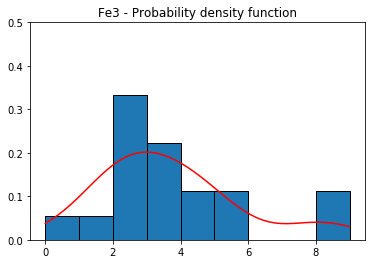

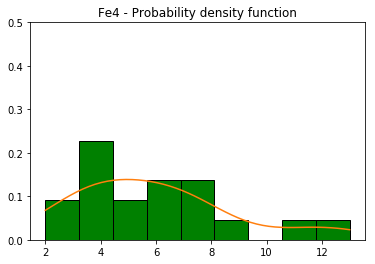

In [4]:
# non-parametric pdf of Fe3
nparam_density = stats.kde.gaussian_kde(fe3.loc[:,'Iron'].values.ravel())
x = np.linspace(0, 9)
nparam_density = nparam_density(x)
fig, ax = plt.subplots()
ax.hist(fe3.loc[:,'Iron'].values, 9, (0,9), density=True, edgecolor = 'black')
ax.plot(x, nparam_density, color = 'r')
ax.set_ylim([0, 0.5])
plt.title('Fe3 - Probability density function')
plt.show()

# non-parametric pdf of Fe4
nparam_density = stats.kde.gaussian_kde(fe4.loc[:,'Iron'].values.ravel())
x = np.linspace(2, 13)
nparam_density = nparam_density(x)
fig, ax = plt.subplots()
ax.hist(fe4.loc[:,'Iron'].values, 9, (2,13), density=True, facecolor = 'g', edgecolor = 'black')
ax.plot(x, nparam_density)
ax.set_ylim([0, 0.5])
plt.title('Fe4 - Probability density function')
plt.show()

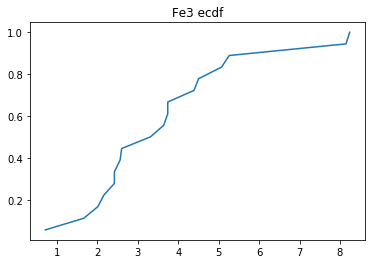

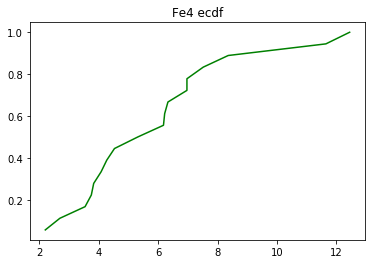

In [5]:
# ecdf Fe3
ecdf = ECDF(fe3_np)
plt.plot(ecdf.x, ecdf.y)
plt.title('Fe3 ecdf')
plt.show()

# ecdf Fe4
ecdf = ECDF(fe4_np)
plt.plot(ecdf.x, ecdf.y, color = 'g')
plt.title('Fe4 ecdf')
plt.show()